Different morphologies of the same neuron type might require different activation to reach comparable firing frequency. InputScaling simulates a network of a neuron type with different number of inputs, and different frequency to infer what level of input is needed.

Here we look at the input to ```neuron_types="fs"```.

During a simulation we can vary the input frequency, but not the number of inputs coupled to a neuron, so we use a set of ```num_replicas``` copies of each morphology, each receiving a different number of inputs from ```num_input_min``` to ```num_input_max``` of a given ```input_type``` (e.g. for striatum "cortical" or "thalamic"). 

A set of input frequencies are tested, specified by ```input_frequency_range```, and each of these frequencies is run for ```input_duration``` seconds. In this example we create a small example, but we recommend that use use a longer input duration (e.g. 10 seconds, or possibly more).

In [1]:
import os
from snudda.input_tuning.input_tuning import InputTuning
network_path = os.path.join("networks", "input_scaling")
input_tuning = InputTuning(network_path)

We create a network without any synapses and connect different number of external inputs to the neurons. Each neuron then receives a range of input frequencies.

In [2]:
neurons_path = os.path.join("$DATA", "neurons", "striatum")
input_tuning.setup_network(neurons_path=neurons_path, 
                           num_replicas=5,
                           neuron_types="fs")
input_tuning.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                         num_input_min=100,
                         num_input_max=1000,
                         input_duration=2.0,
                         input_frequency_range=[1.0, 2.0, 3.0])


Skipping neuron type lts
Skipping neuron type dspn
Skipping neuron type ispn
Skipping neuron type chin
Found 4 neurons in /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Writing network config file to networks/input_scaling/network-config.json
No d_view specified, running distribute neurons in serial
No connections specified in connectivity_distribution.
No output file created, no synapses exist?
Creating symbolic link to MERGE file instead
networks/input_scaling/network-pruned-synapses.hdf5 -> network-putative-synapses-MERGED.hdf5
Using cortical synapse density for input.
Loading 20 neurons with 0 synapses and 0 gap junctions
Writing spikes to networks/input_scaling/input.hdf5


In [3]:
from snudda.input import SnuddaInput

si = SnuddaInput(input_config_file=input_tuning.input_config_file,
                 hdf5_network_file=input_tuning.network_file,
                 spike_data_filename=input_tuning.input_spikes_file,
                 time=input_tuning.max_time)
si.generate()

Writing spikes to networks/input_scaling/input.hdf5


In [4]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
ls: cannot access '../../snudda/data/neurons/mechanisms/*.inc': No such file or directory
COBJS=''
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  bk_ch.lo bk_fs.lo bk_ms.lo ca_ch.lo cadyn_fs.lo cadyn_ms.lo cal12_ms.lo cal13_ms.lo cal_ch.lo caldyn_ms.lo can_fs.lo can_ms.lo cap_ch.lo caq_fs.lo caq_ms.lo car_fs.lo car_ms.lo cat32_ms.lo cat33_ms.lo concACh.lo concDAfile.lo concDA.lo hcn12_ch.lo hd_lts.lo im_lts.lo it_lts.lo kaf_fs.lo kaf_ms.lo kas_fs.lo kas_ms.lo kcnq_ch.lo kdrbca1_lts.lo kdr_fs.lo kdr_lts.lo kdr_m

For large runs, to simulate in parallel use:

```mpiexec -n 4 python3 ../../snudda/input_tuning/input_scaling.py simulate networks/input_scaling/```

Below we just run it in serial in the notebook.

In [5]:
input_tuning.simulate()

Loading 20 neurons with 0 synapses and 0 gap junctions
Running simulation for 6000.0 ms.
Running simulation for 6.0 s
1% done. Elapsed: 4.8 s, estimated time left: 472.5 s
22% done. Elapsed: 105.3 s, estimated time left: 373.5 s
42% done. Elapsed: 206.4 s, estimated time left: 285.0 s
63% done. Elapsed: 310.8 s, estimated time left: 182.5 s
84% done. Elapsed: 413.4 s, estimated time left: 78.7 s
Simulation run time: 490.3437923809979 s
Simulation done, saving output
Writing spike times to networks/input_scaling/output_spikes.txt
Program run time: 509.54371407895815


Loading 20 neurons with 0 synapses and 0 gap junctions


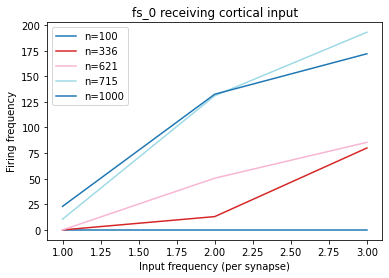

<Figure size 432x288 with 0 Axes>

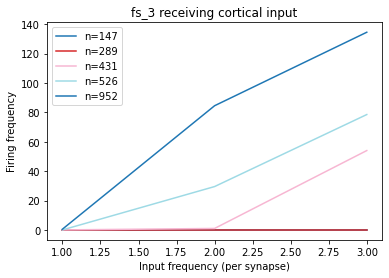

<Figure size 432x288 with 0 Axes>

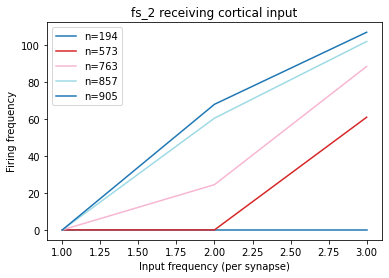

<Figure size 432x288 with 0 Axes>

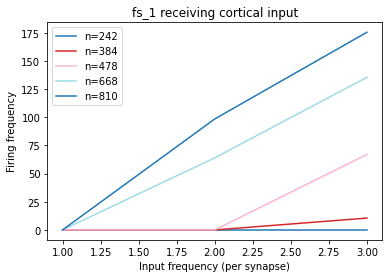

<Figure size 432x288 with 0 Axes>

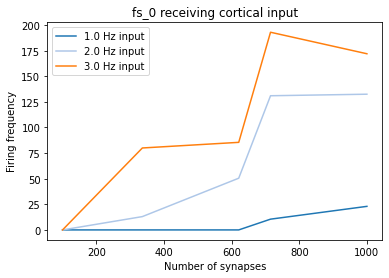

<Figure size 432x288 with 0 Axes>

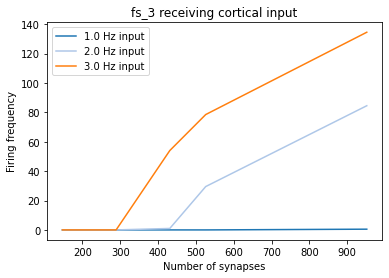

<Figure size 432x288 with 0 Axes>

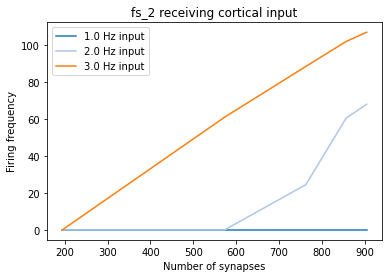

<Figure size 432x288 with 0 Axes>

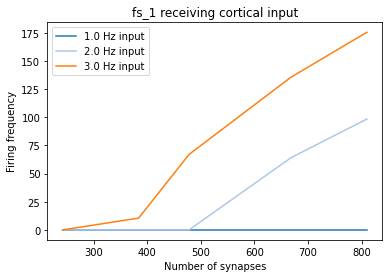

To plot traces:
python3 plotting/Network_plot_traces.py networks/input_scalingoutput_volt.txt networks/input_scalingnetwork-pruned-synapses.hdf5 


<Figure size 432x288 with 0 Axes>

In [6]:
input_tuning.analyse_results(show_plots=True)